In [17]:
from analyze_dataset import *
% matplotlib inline

Dividing and calculating periods: 100%|██████████| 1500/1500 [00:01<00:00, 1017.78it/s]

estimated average(ish) period 116.0 from first 1497.6 images
section periods


resample, using 200 samples per period: 100%|██████████| 6/6 [00:00<00:00, 119.09it/s]

 [117.40000000000003, 116.60000000000002, 115.60000000000001, 115.60000000000001, 116.00000000000001, 117.40000000000003]
period range 115.6 to 117.4
6 image sections
0


calculate sequence shifts: 100%|██████████| 6/6 [00:00<00:00, 168.48it/s]

 / 1407 skipped as anomalous
 took 0.03675103187561035
[(0, 1, 198, 5372354.7469863892), (0, 2, 196, 3694102.8653182983), (0, 3, 197, 3670097.1901016235), (0, 4, 193, 7558402.2004241943), (1, 2, 198, 2282322.8873825073), (1, 3, 198, 3159414.8561782837), (1, 4, 195, 4899776.5205993652), (1, 5, 192, 4298117.5439910889), (2, 3, 0, 2743823.4865875244), (2, 4, 197, 5016496.3814468384), (2, 5, 194, 4792262.0984420776), (3, 4, 197, 4450930.8505172729), (3, 5, 194, 5468205.4511413574), (4, 5, 197, 2942550.5945281982)]
Solving using 5 of 14 constraints (max range 1 )
Done first stage
Solving using 14 of 14 constraints (max range 32 )
Solving using 14 of 14 constraints (max range 128 )
Solving using 14 of 14 constraints (max range 512 )
Solving using 14 of 14 constraints (max range 2048 )
assign 2.0 6.28318530718 2.2348 6.28318530718
assign 2.235 0.0543054155731 2.4682 -6.22887989161
assign 2.469 0.117408026188 2.7002 0.117408026188
assign 2.701 0.112485575406 2.9322 0.112485575406
assign 2.933 


loading images: 100%|██████████| 1500/1500 [00:00<00:00, 5068.65it/s]

 postacquisition_phase ) for /Users/jonny/Movies/Example_compr_sens_datasets/New datasets w jt phase annotation/Darkfield/df_fish3_maskA_photodiodetifs_2000to3499
100


/Volumes/Development/Spim_GUI/j_postacquisition/phase_wrap_interpolation.py:34: RuntimeWarning: invalid value encountered in greater
  wrapIndices = np.where((beforePhases > 0.75 * phaseWrapValue) & (afterPhases < 0.25 * phaseWrapValue))
loading images: 100%|██████████| 600/600 [00:15<00:00, 37.60it/s]

 / 1500 failed to recover a phase
estimated average(ish) period


Dividing and calculating periods: 100%|██████████| 600/600 [02:14<00:00,  4.47it/s]

 46.5 from first 600 images
section periods


resample, using 80 samples per period: 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

 [47.400000000000247, 46.400000000000233, 45.600000000000222, 46.600000000000236, 46.400000000000233, 46.400000000000233]
period range 45.6 to 47.4
6 image sections
0


calculate sequence shifts: 100%|██████████| 6/6 [00:39<00:00,  6.60s/it]

 / 566 skipped as anomalous
 took 39.60320711135864
[(0, 1, 79, 33186353.440551758), (0, 2, 79, 42270234.735198975), (0, 3, 79, 46786615.409698486), (0, 4, 78, 58815456.112060547), (1, 2, 0, 35806626.815490723), (1, 3, 0, 34725114.659851074), (1, 4, 79, 46666723.247314453), (1, 5, 78, 56402110.650360107), (2, 3, 0, 36135501.679779053), (2, 4, 79, 37214338.517089844), (2, 5, 79, 46586305.969970703), (3, 4, 78, 31670405.152862549), (3, 5, 78, 36022095.410736084), (4, 5, 0, 27511666.929107666)]
Solving using 5 of 14 constraints (max range 1 )
Done first stage
Solving using 14 of 14 constraints (max range 32 )
Solving using 14 of 14 constraints (max range 128 )
Solving using 14 of 14 constraints (max range 512 )
Solving using 14 of 14 constraints (max range 2048 )
assign 10.0 1.76841712993e-15 11.185 6.28318530718
assign 11.1875 0.0739000049556 12.3475 6.35708531214
assign 12.35 0.0848383900977 13.49 -6.19834691708
assign 13.5 0.058354305382 14.665 6.34153961256
assign 14.675 0.18191394403


loading images: 100%|██████████| 600/600 [00:01<00:00, 439.06it/s]

 postacquisition_phase ) for /Users/jonny/Movies/Example_compr_sens_datasets/New datasets w jt phase annotation/Darkfield/df_fish3_maskA_widefield_800to1399
41


/Volumes/Development/Spim_GUI/j_postacquisition/phase_wrap_interpolation.py:34: RuntimeWarning: invalid value encountered in greater
  wrapIndices = np.where((beforePhases > 0.75 * phaseWrapValue) & (afterPhases < 0.25 * phaseWrapValue))
edit plists: 100%|██████████| 600/600 [00:00<00:00, 629.56it/s]

 / 600 failed to recover a phase


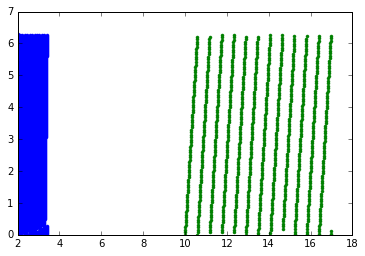

In [22]:
import phase_assignment

frameRanges = None

def AssignPhaseToFourPiImageSection2(phaseStart, imageSection):
    # Assign phases to a sequence of (resample) images that should represent exactly two full phases.
    # This means that the final image is just *before* the 4pi point, of course.
    times = []
    phases = []
    for i in range(len(imageSection)):
        imageSection[i].phase = (phaseStart + (i * 4*np.pi / len(imageSection))) % (2*np.pi)
        times.append(imageSection[i].timestamp)
        phases.append(imageSection[i].phase)
    print('assign', imageSection[0].timestamp, imageSection[0].phase, 2*imageSection[-1].timestamp-imageSection[len(imageSection)-2].timestamp, 2*imageSection[-1].phase-imageSection[len(imageSection)-2].phase)
    return (times, phases)

phase_assignment.AssignPhaseToFourPiImageSection = AssignPhaseToFourPiImageSection2

# Analyze photodiode channels, with 4-point averaging to smooth out 50Hz interference
# Note that we look for time_processing_started in the photodiode channel. That is just a synthetic timestamp, and I presume that's the key I suggested Alex fills in.
basePath = '/Users/jonny/Movies/Example_compr_sens_datasets/New datasets w jt phase annotation/Darkfield'
(kt1, kp1) = AnalyzeDataset(basePath, frameRanges, ['df_fish3_maskA_photodiodetifs_2000to3499'], periodRange = np.arange(115, 125, 0.2), numSamplesPerPeriod = 200, source='df_fish3_maskA_photodiodetifs_2000to3499', applyDriftCorrection=False, downsampling=1, interpolationDistanceBetweenSequences=4, rollingAverage=True, sourceTimestampKey='time_processing_started', fluorTimestampKey='time_processing_started')
    
basePath = '/Users/jonny/Movies/Example_compr_sens_datasets/New datasets w jt phase annotation/Darkfield'
(kt3, kp3) = AnalyzeDataset(basePath, frameRanges, ['df_fish3_maskA_widefield_800to1399'], periodRange = np.arange(30, 56, 0.1), numSamplesPerPeriod = 80, source='df_fish3_maskA_widefield_800to1399', applyDriftCorrection=False, downsampling=1, interpolationDistanceBetweenSequences=4, sourceTimestampKey='synthetic_timestamp', fluorTimestampKey='synthetic_timestamp')

/Users/jonny/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/Users/jonny/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/Users/jonny/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less
/Users/jonny/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater
/Users/jonny/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less


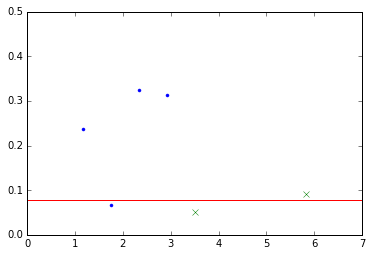

In [14]:
def diffs(knownTimes, knownPhases):
    y = knownPhases[1:] - knownPhases[0:knownPhases.size-1]
    y[np.where(y<0)]=np.nan
    x = knownTimes - knownTimes[0]
    x = x[1:]
    return (x,y)

(x1,y1) = diffs(kt1, kp1)
x1 = x1 * 2.5
y1 = y1 * 2.5

if True:
    (x3,y3) = diffs(kt3, kp3)
else:
    x3=x1
    y3=y1

y1[np.where(((y1>0.0784) & (y1 < 0.0786)) == True)] = np.nan
y3[np.where(((y3>0.0784) & (y3 < 0.0786)) == True)] = np.nan
plt.gcf().clear()
plt.ylim((0,0.5))
plt.plot(x1,y1, '.')
plt.plot(x3,y3, 'x')
plt.plot(np.array([0,7]), np.array([0.07853982, 0.07853982]))
plt.show()

In [28]:
# Look at the chosen trigger times and look up what the phases are for these
photodiodeDarkfieldTriggerTimes = np.array([11.238700, 11.792274, 12.402849, 12.977039, 13.556979, 14.145044, 14.711397, 15.278450, 15.873462, 16.453508, 17.017803])       # target 130, 2/3rds through

print(photodiodeDarkfieldTriggerTimes)
recoveredPhases = interpolate_with_phase_wrap(photodiodeDarkfieldTriggerTimes, kt3, kp3)
print(recoveredPhases)

recoveredPhasesC = interpolate_with_phase_wrap(photodiodeDarkfieldTriggerTimes, kt1*5, kp1)
print(recoveredPhasesC)



[ 11.2387    11.792274  12.402849  12.977039  13.556979  14.145044
  14.711397  15.27845   15.873462  16.453508  17.017803]
[ 0.6285536   0.34227868  0.6673999   0.71358682  0.67296309  0.73299043
  0.57620549  0.43594963  0.58507033  0.58556865         nan]
[ 0.74082155  0.42368774  0.74625921  0.70484237  0.67752656  0.78693877
  0.7138615   0.57360564  0.76997021  0.69553534         nan]


/Volumes/Development/Spim_GUI/j_postacquisition/phase_wrap_interpolation.py:34: RuntimeWarning: invalid value encountered in greater
  wrapIndices = np.where((beforePhases > 0.75 * phaseWrapValue) & (afterPhases < 0.25 * phaseWrapValue))


In [82]:
print(chosenTriggerTimes)
print(triggerPhases)
print(np.std(triggerPhases[0:-1]))
print(np.std(triggerPhases[0:-1]) / (2.0 * np.pi))

[ 2.2630698  2.3792996  2.495628   2.6118892  2.7276036  2.8444408
  2.9587112  3.07396    3.1902184  3.3060678  3.4241838]
[ 1.60216692  1.5608053   1.58315387  1.59730187  1.57755264  1.6228999
  1.6071939   1.56650486  1.63278401  1.5182703          nan]
0.0317218854842
0.005048694879


In [ ]:
chosenTriggerTimes = np.array([11.515601, 12.095853, 12.671881, 13.242776, 13.831592, 14.416269, 14.993348, 15.575439, 16.153500, 16.732067, 17.315109])
chosenTriggerTimes = chosenTriggerTimes 